# US  SUPERSTORE 

## Scenario
A US Superstore has a dataset on their sales from the year 2014 to 2017. The company wants to know who are their top 20 high revenue customers and low revenue customers for 2016 and 2017. The company wants to know if they can increase the discounts for the high revenue customers or reduce or leave the discount as it is.

TASK: Highlight the top 20 High revenue customers for the year 2016 and 2017 in other for the company to make a decision.
Data visualization would be used for the firm to understand the data easily. Given Dataset from 2014 to 2017; the following has to be done:
- Extract data for year 2016 and 2017.
- Get average sales and profit of each year, even the total profit as well.
- Use the average profit as a benchmark to classify low revenue and high revenue customers.
- Plot a graph for easier understanding for the company.

In [2]:
import pandas as pd
from datetime import datetime


In [3]:
# Imported data from my computer. The data was stored in my program files.

df = pd.read_csv(r'C:\Program Files\PostgreSQL\13\data\data copy\Sales.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,TEC-PH-10001499,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,TEC-AC-10004671,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,OFF-ST-10003821,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,FUR-FU-10023495,29.6000,4,0.00,13.3200


### US Superstore Dataset 2016

In [ ]:
# Set the date in the table, used datetime64[ns]

df["Ship Date"] = df["Ship Date"].astype("datetime64[ns]")

In [5]:
df = df[
    (df["Ship Date"] >= datetime(2016, 1, 1)) & (df["Ship Date"] < datetime(2017, 1, 1))
].copy()
df_2016=df
df_2016

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,FUR-BO-10001798,261.960,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,FUR-CH-10000454,731.940,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,2016-06-16,Second Class,DV-13045,OFF-LA-10000240,14.620,2,0.0,6.8714
13,14,CA-2016-161389,12/5/2016,2016-12-10,Standard Class,IM-15070,OFF-BI-10003656,407.976,3,0.2,132.5922
21,22,CA-2016-137330,12/9/2016,2016-12-13,Standard Class,KB-16585,OFF-AR-10000246,19.460,7,0.0,5.0596
...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,US-2016-103674,12/6/2016,2016-12-10,Standard Class,AP-10720,OFF-PA-10002255,13.376,4,0.2,4.6816
9979,9980,US-2016-103674,12/6/2016,2016-12-10,Standard Class,AP-10720,OFF-BI-10004721,437.472,14,0.2,153.1152
9982,9983,US-2016-157728,9/22/2016,2016-09-28,Standard Class,RC-19960,TEC-PH-10004541,35.560,7,0.0,16.7132
9983,9984,US-2016-157728,9/22/2016,2016-09-28,Standard Class,RC-19960,OFF-PA-10002952,97.980,2,0.0,27.4344


Taking data from specific Ship Date (ie. from 2016.01.01 to 2016.12.31), we have 2,578 Shipments of products from the company. In order to get the correct data for each customer; the aggregate of the data for both 2016 and 2017 is calculated to know the exact number of customers that ordered in 2016 and 2017. 



In terms of customers; we need find the following:
- High revenue Customers.
- Low revenue Customers.

In [8]:
import statistics
import math
import numpy as np

In [9]:
agg_df_2016=df_2016.groupby('Customer ID')[['Sales','Profit']].sum()
agg_df_2016['Profit']=agg_df_2016['Profit'].apply(np.ceil)
agg_df_2016['Sales']=agg_df_2016['Sales'].apply(np.ceil)
agg_df_2016

,Sales,Profit
Customer ID,,
AA-10315,4407.0,-747.0
AA-10375,531.0,123.0
AA-10480,1748.0,421.0
AA-10645,1669.0,335.0
AB-10015,564.0,117.0
...,...,...
WB-21850,2095.0,294.0
XP-21865,817.0,315.0
YC-21895,1572.0,428.0


In [10]:
# Average sales in the year 2016

avg_sales16=agg_df_2016["Sales"].mean()
avg_sales16=math.ceil(avg_sales16)
avg_sales16
print(f'The average sales in the year 2016 was {avg_sales16} US dollars.')

The average sales in the year 2016 was 967 US dollars.


In [11]:
# Average profit in the year 2016

avg_profit16=agg_df_2016["Profit"].mean()
avg_profit16=math.ceil(avg_profit16)
avg_profit16
print(f'The average profit in the year 2016 was {avg_profit16} US dollars.')

The average profit in the year 2016 was 132 US dollars.


In [95]:
#  -- The maximum profit from customers in the year 2016 was {max_profit_2016} and minimum profit was {min_profit_2016}''

max_profit_2016=agg_df_2016['Profit'].max()
min_profit_2016=agg_df_2016['Profit'].min()
sum_profit_2016=agg_df_2016['Profit'].sum()
print(f'The total profit of 2016 was {sum_profit_2016} US dollars. The maximum profit for the year 2016 was {max_profit_2016} US dollars and minimum profit was {min_profit_2016} US dollars')

The total profit of 2016 was 83263.0 US dollars. The maximum profit for the year 2016 was 8765.0 US dollars and minimum profit was -6696.0 US dollars


The above calculations, we obtained the following:
- The avearge sales as 967 US dollars.
- The average profit as 132 US dollars. 
- The maximum profit as 8,765 US dollars.
- The minimum profit as -6696 US dollars which is a loss.
- The total profit of the year 2016 was 83,263 US dollars.

### Low revenue Customers for 2016

In [13]:
# Low revenue Customers for 2016

df_2016_cust0 = agg_df_2016[(agg_df_2016["Sales"] < avg_sales16)].copy()
cust0_2016= df_2016_cust0
cust0_2016

,Sales,Profit
Customer ID,,
AA-10375,531.0,123.0
AB-10015,564.0,117.0
AB-10150,16.0,6.0
AB-10255,66.0,27.0
AC-10420,58.0,22.0
...,...,...
VG-21805,87.0,29.0
VM-21835,350.0,104.0
VP-21760,199.0,32.0


In [96]:
#  -- The maximum profit from low revenue customers was {max_profit_2016} and minimum profit was {min_profit_2016}''

max_profit_2016_cust0=cust0_2016['Profit'].max()
min_profit_2016_cust0=cust0_2016['Profit'].min()
sum_profit_2016_cust0=cust0_2016['Profit'].sum()
print(f'The total revenue from 427 Low revenue was {sum_profit_2016_cust0} US dollars. The maximum profit from low revenue customers was {max_profit_2016_cust0} US dollars and minimum profit was {min_profit_2016_cust0} US dollars')

The total revenue from 427 Low revenue was 15596.0 US dollars. The maximum profit from low revenue customers was 380.0 US dollars and minimum profit was -461.0 US dollars


The above calculations;the following was gathered from the data:
- The total revenue from 427 Low revenue was 15,596.0 US dollars.
- The maximum profit from low revenue customers was 380.0 US dollars.
- The minimum profit was -461.0 US dollars which is a loss.
- Out of the total profit of 83,263 US dollars; the Low revenue customers contributed 19% to the 2016 profit.

### High revenue Customers for 2016

In [15]:
# High revenue Customers for 2016

df_2016_cust1 = agg_df_2016[(agg_df_2016["Sales"] >= avg_sales16)].copy()
cust1_2016= df_2016_cust1
cust1_2016

,Sales,Profit
Customer ID,,
AA-10315,4407.0,-747.0
AA-10480,1748.0,421.0
AA-10645,1669.0,335.0
AB-10060,4801.0,1569.0
AB-10105,10404.0,4748.0
...,...,...
VW-21775,1122.0,-188.0
WB-21850,2095.0,294.0
YC-21895,1572.0,428.0


In [110]:
#  -- The maximum profit from high revenue customers was {max_profit_2016} and minimum profit was {min_profit_2016}''

max_profit_2016_cust1=cust1_2016['Profit'].max()
min_profit_2016_cust1=cust1_2016['Profit'].min()
sum_profit_2016_cust1=cust1_2016['Profit'].sum()
print(f'The total profit that High revenue customers contributed {sum_profit_2016_cust1} wasThe maximum profit from High revenue customers was {max_profit_2016_cust1} US dollars and minimum profit was {min_profit_2016_cust1} US dollars')

The total profit that High revenue customers contributed 67667.0 wasThe maximum profit from High revenue customers was 8765.0 US dollars and minimum profit was -6696.0 US dollars


The above calculations; the following was gathered from the data for High revenue customers:
- The total revenue from 206 Low revenue was 67,667.0 US dollars.
- The maximum profit from High revenue customers was 8,765.0 US dollars.
- The minimum profit was -6696.0 US dollars which is a loss.
- Out of the total profit of 83,263 US dollars; the High revenue customers contributed 81% to the 2016 profit.

### US Superstore Dataset for 2017

In [21]:
#  2017 Analysis on Customer data

df1 = pd.read_csv(r'C:\Program Files\PostgreSQL\13\data\data copy\Sales.csv')
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,TEC-PH-10001499,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,TEC-AC-10004671,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,OFF-ST-10003821,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,FUR-FU-10023495,29.6000,4,0.00,13.3200


In [22]:
# I had to get the table again ,so its faster for me. And the df1 so i can get data for the year 2017 which is called df_2017 using Ship Date.

df1["Ship Date"] = df1["Ship Date"].astype("datetime64[ns]")
df1 = df1[
    (df1["Ship Date"] >= datetime(2017, 1, 1)) & (df1["Ship Date"] < datetime(2018, 1, 1))
].copy()
df_2017=df1
df_2017

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
12,13,CA-2017-114412,4/15/2017,2017-04-20,Standard Class,AA-10480,OFF-PA-10002365,15.552,3,0.2,5.4432
23,24,US-2017-156909,7/16/2017,2017-07-18,Second Class,SF-20065,FUR-CH-10002774,71.372,2,0.3,-1.0196
34,35,CA-2017-107727,10/19/2017,2017-10-23,Second Class,MA-17560,OFF-PA-10000249,29.472,3,0.2,9.9468
41,42,CA-2017-120999,9/10/2017,2017-09-15,Standard Class,LC-16930,TEC-PH-10004093,147.168,4,0.2,16.5564
43,44,CA-2017-139619,9/19/2017,2017-09-23,Standard Class,ES-14080,OFF-ST-10003282,95.616,2,0.2,9.5616
...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,11/17/2017,2017-11-21,Standard Class,RA-19885,OFF-BI-10003689,206.100,5,0.0,55.6470
9990,9991,CA-2017-121258,2/26/2017,2017-03-03,Standard Class,DB-13060,TEC-AC-10004671,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,2017-03-03,Standard Class,DB-13060,OFF-ST-10003821,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,2017-03-03,Standard Class,DB-13060,FUR-FU-10023495,29.600,4,0.0,13.3200


In [23]:
agg_df_2017=df_2017.groupby('Customer ID')[['Sales','Profit']].sum()
agg_df_2017['Profit']=agg_df_2017['Profit'].apply(np.ceil)
agg_df_2017['Sales']=agg_df_2017['Sales'].apply(np.ceil)
agg_df_2017

,Sales,Profit
Customer ID,,
AA-10315,375.0,97.0
AA-10375,207.0,69.0
AA-10480,16.0,6.0
AA-10645,13.0,7.0
AB-10060,2937.0,478.0
...,...,...
XP-21865,450.0,81.0
YC-21895,751.0,38.0
YS-21880,5341.0,1525.0


In [24]:
# Average sales in the year 2017

avg_sales17=agg_df_2017["Sales"].mean()
avg_sales17=math.ceil(avg_sales16)
avg_sales17
print(f'The average sales in the year 2017 was {avg_sales17} US dollars.')

The average sales in the year 2017 was 967 US dollars.


In [25]:
# Average Profit in the year 2017

avg_profit17=agg_df_2017["Profit"].mean()
avg_profit17=math.ceil(avg_profit17)
avg_profit17
print(f'The average profit in the year 2017 was {avg_profit17} US dollars.')

The average profit in the year 2017 was 135 US dollars.


In [113]:
#  -- The maximum profit from customers in the year 2017 was {max_profit_2017} and minimum profit was {min_profit_2017}''

max_profit_2017=agg_df_2017['Profit'].max()
min_profit_2017=agg_df_2017['Profit'].min()
sum_profit_2017=agg_df_2017['Profit'].sum()
print(f'The total profit from 691 customers was {sum_profit_2017} US dollars. The maximum profit for the year 2017 was {max_profit_2017} and minimum profit was {min_profit_2017}')


The total profit from 691 customers was 92680.0 US dollars. The maximum profit for the year 2017 was 6781.0 and minimum profit was -3825.0


The above calculations of the year 2017; the following information from the dataset was :
- The avearge sales as 967 US dollars.
- The average profit as 135 US dollars. 
- The maximum profit as 6,781 US dollars.
- The minimum profit as -3825 US dollars which is a loss.
- The total profit of the year 2016 was 92,680 US dollars.

In [27]:
# Low revenue Customers for 2017

df_2017_cust0 = agg_df_2017[(agg_df_2017["Sales"] < avg_sales17)].copy()
cust0_2017= df_2017_cust0
cust0_2017

,Sales,Profit
Customer ID,,
AA-10315,375.0,97.0
AA-10375,207.0,69.0
AA-10480,16.0,6.0
AA-10645,13.0,7.0
AB-10150,231.0,41.0
...,...,...
VS-21820,172.0,-6.0
XP-21865,450.0,81.0
YC-21895,751.0,38.0


In [115]:
## The maximum profit from low revenue customers 2017 was {max_profit_2017} and minimum profit was {min_profit_2017}''

max_profit_2017_cust0=cust0_2017['Profit'].max()
min_profit_2017_cust0=cust0_2017['Profit'].min()
sum_profit_2017_cust0=cust0_2017['Profit'].sum()
print(f'The total profit of {sum_profit_2017_cust0} US dollars was made by Low revenue customers. The maximum profit from low revenue customers was {max_profit_2017_cust0} US dollars and minimum profit was {min_profit_2017_cust0} US dollars.')

The total profit of 16691.0 US dollars was made by Low revenue customers. The maximum profit from low revenue customers was 363.0 US dollars and minimum profit was -1136.0 US dollars.


The comapny generated the total profit of 16,691.0 US dollars from 450 Low revenue customers.
Furthermore information extracted from the data is as follows:
- the maximum profit was 363.0 US dollars.
- the minimum profit was -1,136.0 US dollars which is a  loss.
- Low revenue customers contributed 18% to the total profit.

### High revenue Customers for 2017

In [29]:
# High revenue Customers for 2017

df_2017_cust1 = agg_df_2017[(agg_df_2017["Sales"] >= avg_sales17)].copy()
cust1_2017= df_2017_cust1
cust1_2017

,Sales,Profit
Customer ID,,
AB-10060,2937.0,478.0
AB-10105,2292.0,342.0
AB-10600,1476.0,-256.0
AC-10450,3460.0,877.0
AC-10615,2387.0,332.0
...,...,...
VP-21730,975.0,197.0
VP-21760,1894.0,-964.0
VW-21775,1948.0,566.0


In [116]:
## The maximum profit from High revenue customers was {max_profit_2017} and minimum profit was {min_profit_2017}''

max_profit_2017_cust1=cust1_2017['Profit'].max()
min_profit_2017_cust1=cust1_2017['Profit'].min()
sum_profit_2017_cust1=cust1_2017['Profit'].sum()
print(f'The total revenue was {sum_profit_2017_cust1} US dollars. The maximum profit from high revenue customers was {max_profit_2017_cust1} US dollars and minimum profit was {min_profit_2017_cust1} US dollars.')

The total revenue was 75989.0 US dollars. The maximum profit from high revenue customers was 6781.0 US dollars and minimum profit was -3825.0 US dollars.


The history data from 1st January to 31st December; the generated the total profit of 75,989 US dollars from 241 Low revenue customers. Furthermore information extracted from the data is as follows:
- the maximum profit was 6781 US dollars.
- the minimum profit was -3825 US dollars which is a loss.
- High revenue customers contributed 82% to the total profit.

### Data Visulation for  2016 and 2017 Dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.color_palette("Set2")

 Number of Low revenue Customers here are 427.


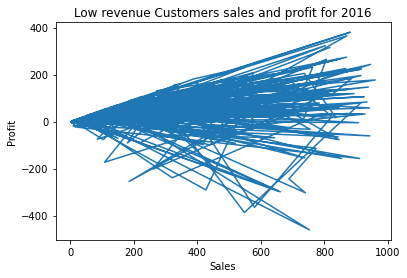

In [122]:
fig1,ax=plt.subplots()
plt.title('Low revenue Customers sales and profit for 2016')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.plot(cust0_2016['Sales'],cust0_2016['Profit'])#
print(f' Number of Low revenue Customers here are 427.')

fig 1: From the plotted graph; It shows clearly the sales and profit of Low revenue customer for 2016. Majority of the sales from these customers are between 0 to 200 US dollars of profit. 

 Number of High revenue Customers here are 206.


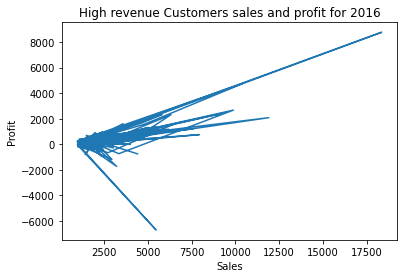

In [121]:
fig2,ax=plt.subplots()
plt.title('High revenue Customers sales and profit for 2016')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.plot(cust1_2016['Sales'],cust1_2016['Profit'])
print(f' Number of High revenue Customers here are 206.')

fig 2 : Though from the 206 customers; some of the customers genrated profit from the range of 0 to 2000 US dollars. But the other customers; the plot revealed more about the customers sales, especially from sales between 1,000 to about more od US dollars that we had profit 

 Number of low revenue Customers here are 450.


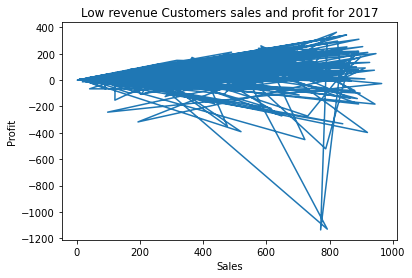

In [123]:
fig3,ax=plt.subplots()
plt.title('Low revenue Customers sales and profit for 2017')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.plot(cust0_2017['Sales'],cust0_2017['Profit'])
print(f' Number of low revenue Customers here are 450.')

fig 3, the plotting reveals much cluster between 0 to 400 US dollars profit and  Sales between 0 to 1000.

 Number of High revenue Customers here are 241.


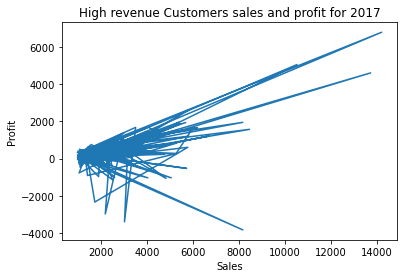

In [124]:
fig4,ax=plt.subplots()
plt.title('High revenue Customers sales and profit for 2017')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.plot(cust1_2017['Sales'],cust1_2017['Profit'])
print(f' Number of High revenue Customers here are 241.')

fig 4; The customers bought most products between 0 to 2000 US dollars profit and Sales from 2000 to 6000 sales

#### Top 20 High revenue customers for 2016 and 2017

In [91]:
# Getting the Customer ID of the 20 High revenue customers with sales and profit for 2016.

hg20_2016=cust1_2016_new.sort_values('Profit',ascending=False).head(20)
hg20_2016


,Sales,Profit
Customer ID,,
TC-20980,18345.0,8765.0
AB-10105,10404.0,4748.0
SE-20110,9880.0,2674.0
BS-11365,9200.0,2406.0
DR-12940,5805.0,2335.0
KD-16270,6318.0,2319.0
CC-12370,11902.0,2084.0
DP-13390,4702.0,1695.0
MC-17425,3582.0,1611.0


<AxesSubplot:title={'center':'The plot of 20 top high revenue customers for 2016'}, xlabel='Customer ID'>

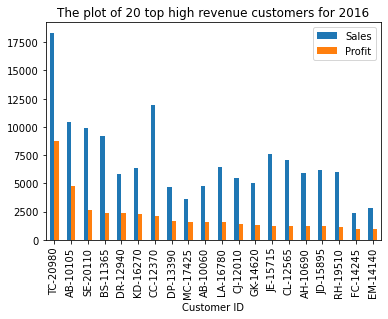

In [129]:
fig5=hg20_2016.plot(kind="bar")
plt.title('The plot of 20 top high revenue customers for 2016')
fig5

fig 5: The bar graph shows the top 20 High revenue customers (2016) with the total number of Sales and Profit from them.

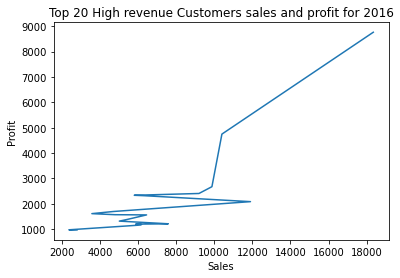

In [87]:
fig6,ax=plt.subplots()
plt.title('Top 20 High revenue Customers sales and profit for 2016')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.plot(hg20_2016['Sales'],hg20_2016['Profit'])


fig 6: This gives a different view of the 20 high customers.

In [54]:
## Average profit for High revenue customers in the year 2017

cust1_avg_profit17=cust1_2017["Profit"].mean()
cust1_avg_profit17=math.ceil(avg_profit17)
cust1_avg_profit17
print(f'The average profit in the for High revenue customers in 2016 was {cust1_avg_profit17} US dollars.')

The average profit in the for High revenue customers in 2016 was 135 US dollars.


In [59]:
## The High revenue customers in 2017 which brought profit of 132 US dollars and above; 
# their Customer ID with Sales and Profit is listed below

cust1_2017_new = cust1_2017[
    (cust1_2017["Profit"] >= cust1_avg_profit17)].copy()
cust1_2017_new     


,Sales,Profit
Customer ID,,
AB-10060,2937.0,478.0
AB-10105,2292.0,342.0
AC-10450,3460.0,877.0
AC-10615,2387.0,332.0
AD-10180,5434.0,1867.0
...,...,...
TT-21460,3262.0,841.0
VP-21730,975.0,197.0
VW-21775,1948.0,566.0


In [84]:
print(f'In 2017, there were 157 Customers who gave the company; a profit of {cust1_avg_profit17} US dollars and more.')   

In 2017, there were 157 Customers who gave the company; a profit of 135 US dollars and more.


In [80]:
# Getting the Customer ID of the 20 High revenue customers with sales and profit for 2017.

hg20_2017=cust1_2017_new.sort_values('Profit',ascending=False).head(20)
hg20_2017

,Sales,Profit
Customer ID,,
RB-19360,14204.0,6781.0
HL-15040,10523.0,5046.0
TA-21385,13724.0,4600.0
AR-10540,5821.0,2608.0
JW-15220,5385.0,1954.0
HW-14935,8167.0,1947.0
BM-11650,5684.0,1939.0
AD-10180,5434.0,1867.0
JE-15610,4075.0,1704.0


<AxesSubplot:title={'center':'The plot of 20 top high revenue customers for 2016'}, xlabel='Customer ID'>

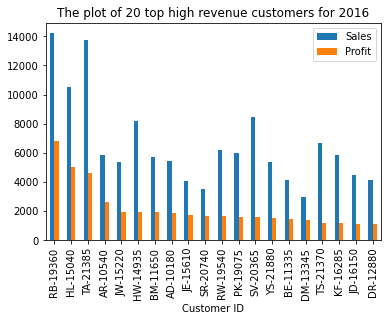

In [132]:
fig7=hg20_2017.plot(kind="bar")
plt.title('The plot of 20 top high revenue customers for 2016')
fig7

fig 7: The bar graph shows the top 20 High revenue customers (2017) with the total number of Sales and Profit from them.

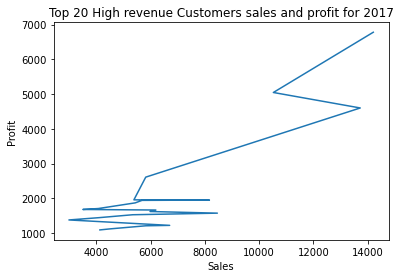

In [88]:
fig8,ax=plt.subplots()
plt.title('Top 20 High revenue Customers sales and profit for 2017')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.plot(hg20_2017['Sales'],hg20_2017['Profit'])


fig 8: This gives a different view of the 20 high customers.

## Conclusion

In conclusion, High revenue customers in 2016 and 2017 generated 82% and 81% respectively. Given the data above, more data needs to be gathered to make a decision about giving discounts only to High revenue customers.